<a href="https://colab.research.google.com/github/KIMMOOKYONG/COLAB-NOTENOOK/blob/main/%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0_%EB%B0%8F_%EC%A7%80%EC%88%98%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차
- 필요 모듈 설치
    - 야후 파이낸스 모듈 설치

- 주가 데이터 다운로드
    - AAPL 주가 데이터 다운로드

- 주가 데이터 전처리

    - 이동평균계산

- 이동 평균 유형 : 이동 평균 유형에는 단순 이동 평균 (SMA), 지수 이동 평균 (EMA)  평활 이동 평균 (SMMA) 및 선형 가중 이동 평균 (LWMA)이 포함됩니다.    

# 필요 모듈 설치

In [ ]:
# 주가 데이터 다운로드 모듈
!pip install yfinance

# 라이브러리 로딩

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 데이터 다운로드

In [10]:
# 주가 데이터 다운로드 및 이동평균 칼럼 초기화
data = yf.download("AAPL", start="2020-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068581,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483612,132079200


# 단순 이동평균계산

In [ ]:
# 이동평균계산
# 활용 예시: 
def ma(data, lookback, what, where):
	"""
	# 파라미터
	@Data: 주가 데이터, numpy
	@lookback: 기간	
	@what: 계산 소스 데이터 칼럼 인덱스
	@where: 계산 결과를 저장할 칼럼 인덱스
	"""	
	for i in range(len(data)):
		try:
			# 현재 인덱스를 기준으로 D-1 이동평균계산
			data[i, where] = (data[i - lookback + 1:i + 1, what].mean())
		except IndexError:
			pass
	return data

In [ ]:
ma_data = data.values
print(ma_data.shape)
ma_data

(624, 7)


array([[7.40599976e+01, 7.51500015e+01, 7.37975006e+01, ...,
        7.37859192e+01, 1.35480400e+08, 0.00000000e+00],
       [7.42874985e+01, 7.51449966e+01, 7.41250000e+01, ...,
        7.30685654e+01, 1.46322800e+08, 0.00000000e+00],
       [7.34475021e+01, 7.49899979e+01, 7.31875000e+01, ...,
        7.36507950e+01, 1.18387200e+08, 0.00000000e+00],
       ...,
       [1.33419998e+02, 1.37059998e+02, 1.33320007e+02, ...,
        1.35869995e+02, 8.10005000e+07, 0.00000000e+00],
       [1.34789993e+02, 1.37759995e+02, 1.33910004e+02, ...,
        1.35350006e+02, 7.34092000e+07, 0.00000000e+00],
       [1.36820007e+02, 1.38589996e+02, 1.35630005e+02, ...,
        1.38270004e+02, 7.23303000e+07, 0.00000000e+00]])

In [ ]:
# 칼럼명 인덱스 지정
OPEN = 0
HIGH = 1
LOW = 2
CLOSE = 3
ADJ_CLOSE = 4
VOLUM = 5
MEAN = 6

# 가공 전후 데이터 shape 확인
print(data.shape, ma_data.shape)

(624, 7) (624, 7)


In [ ]:
# 5일 이동평균 계산
ma_result = ma(ma_data, 5, CLOSE, MEAN)
ma_result.shape

(624, 7)

In [ ]:
# 0 ~ 4까지의 이동평균 검증
import numpy as np
print(np.mean(ma_data[0:5, CLOSE]))
print(ma_result[4, MEAN])

74.95800018310547
74.95800018310547


# 가중 이동평균 계산

In [ ]:
# 지수이동평균
# https://focus95.co.kr/entry/이동평균선의-종류-이해하기-단순-지수-가중-SOMs의-주식투자
# https://alphasquare.tistory.com/24
def ema(Data, alpha, lookback, what, where):
    """
    @Data: 소스 데이터, numpy
    @alpha: 평활 지수
    @window: 기간
    @what: 소스 데이터 칼럼 인덱스
    @where: 계산 결과를 저장할 칼럼 인덱스

    5일 가중이동평균:
    (1*10000 + 2*10650 + 3*10300 + 4*10200 + 5*10000) / (1+2+3+4+5)
    """
    alpha = alpha / (lookback + 1.0)
    beta  = 1 - alpha

    # 단순이동평균계산
    Data = ma(Data, lookback, what, where)

    # 지수이동평균계산
    Data[lookback + 1, where] = (Data[lookback + 1, what] * alpha) + (Data[lookback, where] * beta)
    for i in range(lookback + 2, len(Data)):
            try:
                Data[i, where] = (Data[i, what] * alpha) + (Data[i - 1, where] * beta)
        
            except IndexError:
                pass
    return Data

In [ ]:
ema_data = data.values
ema_data.shape

(624, 7)

In [ ]:
ema_data_result = ema(ema_data, 2, 5, CLOSE, MEAN)
ema_data_result

array([[7.40599976e+01, 7.51500015e+01, 7.37975006e+01, ...,
        7.37859192e+01, 1.35480400e+08,            nan],
       [7.42874985e+01, 7.51449966e+01, 7.41250000e+01, ...,
        7.30685654e+01, 1.46322800e+08,            nan],
       [7.34475021e+01, 7.49899979e+01, 7.31875000e+01, ...,
        7.36507950e+01, 1.18387200e+08,            nan],
       ...,
       [1.33419998e+02, 1.37059998e+02, 1.33320007e+02, ...,
        1.35869995e+02, 8.10005000e+07, 1.34257613e+02],
       [1.34789993e+02, 1.37759995e+02, 1.33910004e+02, ...,
        1.35350006e+02, 7.34092000e+07, 1.34621744e+02],
       [1.36820007e+02, 1.38589996e+02, 1.35630005e+02, ...,
        1.38270004e+02, 7.23303000e+07, 1.35837831e+02]])

In [ ]:
# 0 ~ 4까지의 이동평균
ema_data_result[4, MEAN]

74.95800018310547

In [ ]:
ema_data_df = pd.DataFrame(ema_data_result)

In [ ]:
ema_data_df.head()

,0,1,2,3,4,5,6
0,74.059998,75.150002,73.797501,75.087502,73.785919,135480400.0,NaN
1,74.287498,75.144997,74.125000,74.357498,73.068565,146322800.0,NaN
2,73.447502,74.989998,73.187500,74.949997,73.650795,118387200.0,NaN
3,74.959999,75.224998,74.370003,74.597504,73.304420,108872000.0,NaN
4,74.290001,76.110001,74.290001,75.797501,74.483612,132079200.0,74.958


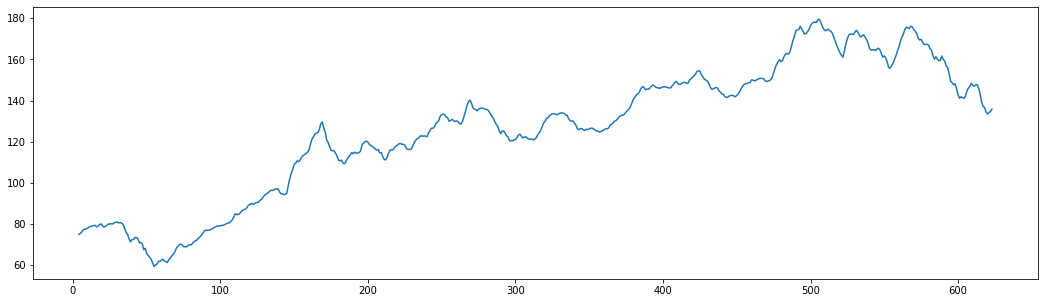

In [ ]:
ema_data_df[6].plot(figsize=(18, 5))

# 판다스를 사용한 이동평균 계산

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068581,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483612,132079200


In [12]:
# 단순이동평균계산
data["sma5"] = data["Close"].rolling(5).mean()
data["sma20"] = data["Close"].rolling(20).mean()
data["sma100"] = data["Close"].rolling(100).mean()
data["sma200"] = data["Close"].rolling(200).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma100,sma200
Date,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068581,146322800,NaN,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200,NaN,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,NaN,NaN,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483612,132079200,74.958,NaN,NaN,NaN


In [13]:
# 지수이동평균계산
data["ema5"] = data["Close"].ewm(5).mean()
data["ema20"] = data["Close"].ewm(20).mean()
data["ema100"] = data["Close"].ewm(100).mean()
data["ema200"] = data["Close"].ewm(200).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
Date,,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400,NaN,NaN,NaN,NaN,75.087502,75.087502,75.087502,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068581,146322800,NaN,NaN,NaN,NaN,74.689318,74.713597,74.720684,74.721590
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200,NaN,NaN,NaN,NaN,74.792444,74.796272,74.797883,74.798105
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,NaN,NaN,NaN,NaN,74.729691,74.742886,74.747038,74.747579
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483612,132079200,74.958,NaN,NaN,NaN,75.027236,74.974876,74.961332,74.959663


In [16]:
# 가중이동평균계산
# https://wendys.tistory.com/178
def weighted_mean(weight_array):
    def inner(x):
        return (weight_array * x).mean()
    return inner

weights = np.arange(1,6)
wma5 = data["Close"].rolling(5).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

weights = np.arange(1,21)
wma20 = data["Close"].rolling(20).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

weights = np.arange(1,101)
wma100 = data["Close"].rolling(100).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

weights = np.arange(1,201)
wma200 = data["Close"].rolling(200).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

data["wma5"] = wma5
data["wma20"] = wma20
data["wma100"] = wma100
data["wma200"] = wma200
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200,wma5,wma20,wma100,wma200
Date,,,,,,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785919,135480400,NaN,NaN,NaN,NaN,75.087502,75.087502,75.087502,75.087502,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068581,146322800,NaN,NaN,NaN,NaN,74.689318,74.713597,74.720684,74.721590,NaN,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200,NaN,NaN,NaN,NaN,74.792444,74.796272,74.797883,74.798105,NaN,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,NaN,NaN,NaN,NaN,74.729691,74.742886,74.747038,74.747579,NaN,NaN,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483612,132079200,74.958,NaN,NaN,NaN,75.027236,74.974876,74.961332,74.959663,75.068667,NaN,NaN,NaN


# 데이터 후처리

In [19]:
# null값 제거
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200,wma5,wma20,wma100,wma200
Date,,,,,,,,,,,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.435913,112559200,120.874001,114.7550,104.177824,88.593500,118.284619,114.676434,98.159701,93.413978,121.158667,116.972476,111.394115,97.879110
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.763733,115393800,121.284000,115.3640,104.572749,88.813162,118.407182,114.883282,98.398565,93.615219,120.540666,117.378667,111.688020,98.181862
2020-10-19,119.959999,120.419998,115.660004,115.980003,114.755844,120639300,119.600000,115.6590,104.936925,89.021275,118.002652,114.935510,98.599572,93.790481,118.772667,117.437334,111.913906,98.452179
2020-10-20,116.199997,118.980003,115.629997,117.510002,116.269691,124423700,118.882001,115.9440,105.317175,89.234075,117.920544,115.058111,98.815443,93.975829,118.076001,117.613620,112.162878,98.735648
2020-10-21,116.669998,118.709999,116.449997,116.870003,115.636429,89946000,118.018001,116.4315,105.681250,89.445437,117.745453,115.144395,99.021232,94.154222,117.405335,117.701810,112.391647,99.010633
